# 📘 K-Nearest Neighbors (KNN) - Guide with Math & Distances

---

## 🔢 What is KNN?

K-Nearest Neighbors (KNN) is a **non-parametric**, **supervised** machine learning algorithm used for both **classification** and **regression**.

Given a new, unseen data point (query point), the model's logic is straightforward:

1.  **Calculate Distances**: It computes the distance between the query point and every single point in the training dataset.
2.  **Find Neighbors**: It identifies the top **'K'** nearest data points (neighbors) from the training set.
3.  **Vote or Average**:
    * For **classification**, it assigns the class label that is most frequent among the K neighbors (a majority vote).
    * For **regression**, it predicts a value that is the average of the values of the K neighbors.

---

## 🧮 Mathematical Formulation

The "distance" between points is the core of KNN. The two most common distance metrics are Euclidean and Manhattan.

### 1. Euclidean Distance (L2 Norm)

This is the most common and intuitive distance metric. It represents the shortest straight-line distance between two points in a multi-dimensional space.

$$
d_{euclidean}(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
$$

-   **Use Case**: Best suited for problems with **low-dimensional**, **continuous** data where the concept of a direct path is meaningful.
-   **Analogy**: Think of it as the distance "as the crow flies."


---

### 2. Manhattan Distance (L1 Norm)

This metric measures the distance by summing the absolute differences of the coordinates. It's like navigating a city grid where you can only travel along horizontal or vertical streets.

$$
d_{manhattan}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

-   **Use Case**: Often performs better in **high-dimensional** spaces or with **sparse** data. It's less sensitive to outliers than Euclidean distance.
-   **Analogy**: The distance a taxi would travel in a city like Manhattan.


---

## 📌 When to Use Which Distance?

Choosing the right distance metric is crucial for the performance of your KNN model.

| Distance | Best Use Case | Why? |
| :--- | :--- | :--- |
| **Euclidean** | Low-dimensional, continuous data | It provides the most natural and shortest path. Most real-world data in lower dimensions fits this model well. |
| **Manhattan**| High-dimensional, sparse data | In high dimensions, Euclidean distances can become less meaningful (see *Curse of Dimensionality*). Manhattan distance is more robust in these scenarios. |

---

## 🧠 Important Notes

-   **Choosing K**: The value of **K** is a critical hyperparameter. A small K can lead to a noisy, unstable model (high variance, or **overfitting**). A large K can oversmooth the decision boundary (high bias, or **underfitting**). It's typically chosen using cross-validation.
-   **Feature Scaling**: Because KNN is distance-based, it's **essential** to scale your features (e.g., using Standardization or Normalization). If one feature has a much larger scale than others (e.g., salary vs. age), it will unfairly dominate the distance calculation.
-   **Computational Cost**: KNN is often called a "lazy learner" because it does no work during the training phase. However, the prediction phase is computationally expensive because it requires calculating the distance to **all** training points for each new prediction.

In [70]:
import numpy as np
from collections import Counter

class BaseKNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError("Unsupported distance metric")

    def _get_neighbors(self, x):
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        return k_indices


In [76]:
class KNNClassifier(BaseKNN):
    def predict(self, X):
        return np.array([self._predict_point(x) for x in X])

    def _predict_point(self, x):
        k_indices = self._get_neighbors(x)
        k_labels = self.y_train[k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]


In [77]:
# knn regressor
class KNNRegressor(BaseKNN):
    def predict(self,X):
        return np.array([self.predict_point(x) for x in X])
    def predict_point(self,x):
        k_indices=self._get_neighbors(x)
        k_labels=self.y_train[k_indices]
        return np.mean(k_labels)

In [78]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn_clf = KNNClassifier(k=5, distance_metric='euclidean')
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)

accuracy = np.mean(predictions == y_test)
print("KNN Classifier Accuracy:", accuracy)


KNN Classifier Accuracy: 0.9666666666666667


In [79]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn_reg = KNNRegressor(k=3, distance_metric='manhattan')
knn_reg.fit(X_train, y_train)
preds = knn_reg.predict(X_test)

mse = mean_squared_error(y_test, preds)
print("KNN Regressor MSE:", mse)


KNN Regressor MSE: 405.3973590095512


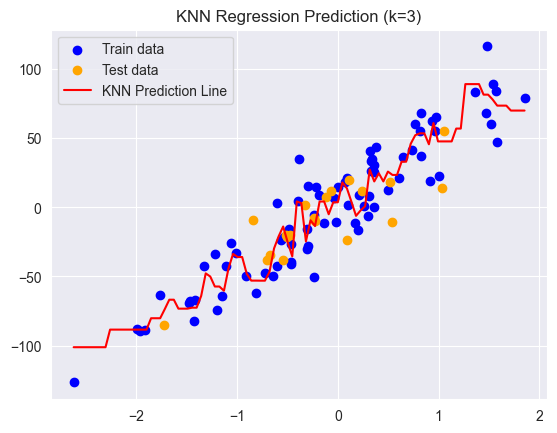

In [80]:
import matplotlib.pyplot as plt

X_plot = np.linspace(min(X.ravel()), max(X.ravel()), 100).reshape(-1, 1)
y_plot = knn_reg.predict(X_plot)

plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
plt.plot(X_plot, y_plot, color='red', label='KNN Prediction Line')
plt.title("KNN Regression Prediction (k=3)")
plt.legend()
plt.grid(True)
plt.show()
